In [4]:
# importing pandas! it is necessary to deal Dataframes!
import pandas as pd

# importing numpy! It does pretty good vectorized calculations!
import numpy as np

# importing Beautiful Soup 4! It is very useful for accessing contents within HTML tags!
import bs4

# to download data from internet through an URL!
import requests

# API to download content from twitter
import tweepy


# to deal data in JSON format!
import json

#import %matplotlib to create visualizations!

import matplotlib.pyplot as plt
%matplotlib inline


#   Let us begin with the **Gathering** of the Data.
    

In [2]:
# reading the csv file! it is indeed very simple, since it is comma-separated!
twar=pd.read_csv('twitter-archive-enhanced.csv')

#visualizing the first 5 elements!
twar.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#   **ASSESSING** the data: utilizando os métodos .info, .sample, .describe, .columns, .value_counts.

In [15]:
#vamos ver quais e quantas colunas nós temos!
print(twar.columns.tolist())
print('O numero de colunas eh igual a {0}'.format(len(twar.columns.tolist())))

['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo']
O numero de colunas eh igual a 17


   Temos então 17 colunas com várias informações sobre o tweet de cada user_id e no total são 17 colunas.

In [8]:
# analisando o DF utilizando info!

twar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

podemos ver várias colunas do tipo objeto e float.

In [18]:
# usando describe() para

twar.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1248,711363825979756544,NaN,NaN,2016-03-20 01:28:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Please, no puparazzi"" 11/10 https://t.co/nJIX...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/711363825...,11,10,None,None,None,None,None
1610,685532292383666176,NaN,NaN,2016-01-08 18:43:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...","For the last time, WE. DO. NOT. RATE. BULBASAU...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/685532292...,9,10,None,None,None,None,None
2342,666082916733198337,NaN,NaN,2015-11-16 02:38:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666082916...,6,10,None,None,None,None,None
480,815736392542261248,NaN,NaN,2017-01-02 01:48:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Akumi. It's his birthday. He received ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/815736392...,11,10,Akumi,None,None,None,None
975,750041628174217216,NaN,NaN,2016-07-04 19:00:33 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Beau. He's trying to keep his daddy fr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750041628...,13,10,Beau,None,None,None,None


   Temos colunas com valores ausentes, como 'in_reply to_status_id' e 'in_reply_to_user_id' que devem ser eliminadas por não conter informações. Isso igualmente é válido para 'retweeted_status_user_id'	e 'retweeted_status_timestamp' que praticamente somente apresentam valores que não são numéricos (np.NaN).


**Cleaning** of the Data: Fatores de Qualidade e Arrumação!


# Quais são os problemas de qualidade e arrumação desse DataFrame (DF)?

## Qualidade

 1) timestamp do jeito que está escrito é um problema.
 vamos separa-la em month, day e year!
 
 2) in_reply_to_status_id e in_reply_to_user_id não significam nada,
 podemos dar um drop nelas.
 
 3) 'retweeted_status_user_id' e 'retweeted_status_timestamp' não significam nada,
 podemos dar um drop nelas.


##  Arrumação

 1) a maneira que foi mostrada rating numerator e rating denominator para fazer concordância com DF posteriores, criaremos uma columa  denominada score_rate = rating_numerator/rating_denominator




**Arrumando o erro de qualidade 1) com respeito à coluna timestamp!**

In [20]:
# Fazendo uma cópia desse DF para poder manipulá-lo!

twar_cp= twar.copy()


**Coding** Codificando a mudança no DF para consertar a coluna timestamp

In [22]:
# criando código para colocar o DF em mes, dia  e ano!

list_month = []
list_day = []
list_year = []
for i in range(len(twar_cp['timestamp'])):
    list_month.append(twar_cp['timestamp'][i].split()[0].split('-')[2])
    list_day.append(twar_cp['timestamp'][i].split()[0].split('-')[1])
    list_year.append(twar_cp['timestamp'][i].split()[0].split('-')[0])


In [26]:
# agregando os valores guardados em uma lista ao DF!

twar_cp['month']=list_month
twar_cp['day']=list_day
twar_cp['year']=list_year


In [27]:
twar_cp['year'].head()

0    2017
1    2017
2    2017
3    2017
4    2017
Name: year, dtype: object

In [28]:
# deletando a coluna timestamp
# não precisamos mais dela

twar_cp.drop(['timestamp'],axis=1,inplace=True)

## testing

In [25]:
twar_cp

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,month,day,year
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,01,08,2017
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,01,08,2017
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,31,07,2017
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,30,07,2017
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,29,07,2017
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None,29,07,2017
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None,28,07,2017
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None,28,07,2017
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None,27,07,2017
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None,26,07,2017


### it seems to be fine!

**Quality** problem 2)
Taking a drop in the unnecessary columns

In [30]:
twar_cp.drop(['in_reply_to_status_id'],axis=1,inplace=True)

In [31]:
twar_cp.drop(['in_reply_to_user_id'],axis=1,inplace=True)

**Testing** the modification

In [32]:
twar_cp.columns

Index(['tweet_id', 'source', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'doggo', 'floofer', 'pupper', 'puppo', 'month', 'day', 'year'],
      dtype='object')

Vemos que as colunas que foram excluídas realmente não estão mais presentes :)

**Quality** problem 3)
Taking a drop in the unnecessary columns

In [33]:
twar_cp.drop(['retweeted_status_id'],axis=1,inplace=True)
twar_cp.drop(['retweeted_status_user_id'],axis=1,inplace=True)


In [34]:
twar_cp.drop(['retweeted_status_timestamp'],axis=1,inplace=True)


**Testing** the code

In [36]:
twar_cp.columns

Index(['tweet_id', 'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'month', 'day', 'year'],
      dtype='object')

Vemos que as colunas que foram excluídas realmente não estão mais presentes :)

**Arrumação**: Lidando com as colunas rating_numerator e rating_denominator

In [40]:
# criando a variável score
# devemos defini-la, creio eu, como o quociente de rating_numerator e
# rating_denominator

list_score=[]

#print(twar_cp['rating_numerator'])

for i in range(len(twar_cp['rating_numerator'])):
    list_score.append(float(twar_cp['rating_numerator'][i]/twar_cp['rating_denominator'][i]))

/home/vagner/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in long_scalars
  # Remove the CWD from sys.path while we load stuff.


In [41]:
twar_cp['score']=list_score

In [42]:
# dropping the unnecessary columns!

twar_cp.drop(['rating_numerator'],axis=1, inplace=True)
twar_cp.drop(['rating_denominator'],axis=1,inplace=True)

**Testing** the code!

In [43]:
#limpeza básica do primeiro DF
twar_cp.head(2)

,tweet_id,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,month,day,year,score
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,None,None,None,None,01,08,2017,1.3
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,None,None,None,None,01,08,2017,1.3


In [44]:
# usando rename para haver compatabilidade com outros DFs

twar_cp.rename(columns={'score':'rate_score'}, inplace=True)

In [46]:
twar_cp.sample(5)

,tweet_id,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,month,day,year,rate_score
384,826958653328592898,"<a href=""http://twitter.com/download/iphone"" r...",This is Loki. He smiles like Elvis. Ain't noth...,https://twitter.com/dog_rates/status/826958653...,Loki,doggo,None,None,None,02,02,2017,1.2
1356,703425003149250560,"<a href=""http://twitter.com/download/iphone"" r...",Really guys? Again? I know this is a rare Alba...,https://twitter.com/dog_rates/status/703425003...,None,None,None,None,None,27,02,2016,0.9
521,809920764300447744,"<a href=""http://twitter.com/download/iphone"" r...","Please only send in dogs. We only rate dogs, n...",https://twitter.com/dog_rates/status/809920764...,None,None,None,None,None,17,12,2016,1.0
837,767754930266464257,"<a href=""http://twitter.com/download/iphone"" r...",This is Philbert. His toilet broke and he does...,https://twitter.com/dog_rates/status/767754930...,Philbert,None,None,None,None,22,08,2016,1.1
1746,679132435750195208,"<a href=""http://twitter.com/download/iphone"" r...",This is Louis. He's a river dancer. His friend...,https://twitter.com/dog_rates/status/679132435...,Louis,None,None,None,None,22,12,2015,1.0


Parece que tudo está funcionando muito bem :) amazing!

# Agora lidando com o segundo DF que deve ser baixado programaticamente

# Gathering!

In [48]:
# Downloading programatically using requests!
import io
url_imagepred='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

data_url = requests.get(url_imagepred).content

'''
!!! abaixo eu poderia eu poderia ter colocado sep='\t', mas eu esqueci inicialmente!
Acabei trabalhando com uma maneira muito mais complicada de ler o arquivo e usar como
DF, mas deu certo! Pelo menos, fiquei orgulhoso de ainda ter dado certo! :)
'''

rawData = pd.read_csv(io.StringIO(data_url.decode('utf-8')))

 Visualizando como os dados parecem estar organizados!


In [49]:

rawData['tweet_id\tjpg_url\timg_num\tp1\tp1_conf\tp1_dog\tp2\tp2_conf\tp2_dog\tp3\tp3_conf\tp3_dog']



0       666020888022790149\thttps://pbs.twimg.com/medi...
1       666029285002620928\thttps://pbs.twimg.com/medi...
2       666033412701032449\thttps://pbs.twimg.com/medi...
3       666044226329800704\thttps://pbs.twimg.com/medi...
4       666049248165822465\thttps://pbs.twimg.com/medi...
5       666050758794694657\thttps://pbs.twimg.com/medi...
6       666051853826850816\thttps://pbs.twimg.com/medi...
7       666055525042405380\thttps://pbs.twimg.com/medi...
8       666057090499244032\thttps://pbs.twimg.com/medi...
9       666058600524156928\thttps://pbs.twimg.com/medi...
10      666063827256086533\thttps://pbs.twimg.com/medi...
11      666071193221509120\thttps://pbs.twimg.com/medi...
12      666073100786774016\thttps://pbs.twimg.com/medi...
13      666082916733198337\thttps://pbs.twimg.com/medi...
14      666094000022159362\thttps://pbs.twimg.com/medi...
15      666099513787052032\thttps://pbs.twimg.com/medi...
16      666102155909144576\thttps://pbs.twimg.com/medi...
17      666104

 what a messy data! the \t separator is still there!


We need to deal this \t separator in the list by using a raw string

In [51]:
# remember to convert to a raw string
colnames_split = r"""tweet_id\tjpg_url\timg_num\tp1\tp1_conf\tp1_dog\tp2\tp2_conf\tp2_dog\tp3\tp3_conf\tp3_dog"""
print(colnames_split.split('\\'))
print(len(colnames_split.split('\\')))



['tweet_id', 'tjpg_url', 'timg_num', 'tp1', 'tp1_conf', 'tp1_dog', 'tp2', 'tp2_conf', 'tp2_dog', 'tp3', 'tp3_conf', 'tp3_dog']
12


In [55]:
# let us take a look at what should be dataframe column names -> all mixed
all_mixed = 'tweet_id\tjpg_url\timg_num\tp1\tp1_conf\tp1_dog\tp2\tp2_conf\tp2_dog\tp3\tp3_conf\tp3_dog'
print(("%r"%rawData[all_mixed][0]).split('\\'))
print(len(("%r"%rawData[all_mixed][0]).split('\\')))



["'666020888022790149", 'thttps://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg', 't1', 'tWelsh_springer_spaniel', 't0.465074', 'tTrue', 'tcollie', 't0.156665', 'tTrue', 'tShetland_sheepdog', 't0.0614285', "tTrue'"]
12


In [57]:
colnames_split = r"""tweet_id\tjpg_url\timg_num\tp1\tp1_conf\tp1_dog\tp2\tp2_conf\tp2_dog\tp3\tp3_conf\tp3_dog"""
colnam = colnames_split.split('\\t')

df_requests=pd.DataFrame({colnam[0]:[],colnam[1]:[],colnam[2]:[],colnam[3]:[],colnam[4]:[],colnam[5]:[],colnam[6]:[],colnam[7]:[],colnam[8]:[],colnam[9]:[],colnam[10]:[],colnam[11]:[]})
#for i in range(len(colnames_split.split('\\'))):
len_to_iter = len(rawData['tweet_id\tjpg_url\timg_num\tp1\tp1_conf\tp1_dog\tp2\tp2_conf\tp2_dog\tp3\tp3_conf\tp3_dog'])
for i in range(len_to_iter):
    all_mixed = 'tweet_id\tjpg_url\timg_num\tp1\tp1_conf\tp1_dog\tp2\tp2_conf\tp2_dog\tp3\tp3_conf\tp3_dog'
    raw_splitted = ("%r"%rawData[all_mixed][i]).split('\\t')
#    for j in range(len(raw_splitted)):
#        print(i,j,len(raw_splitted))
#        df_requests.append(pd.DataFrame({colnam[j]:list(raw_splitted[j])},index=[i]),sort=False)
    df_requests = df_requests.append(pd.Series([raw_splitted[k] for k in range(len(raw_splitted))],index=df_requests.columns),sort=False,ignore_index=True)
#    print(df_requests)

        

Now let us see how does the tab-separated file imported in a non-common way looks!

In [59]:
# raw DataFrame worked!


df_requests.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,'666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.0614285,True'
1,'666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.07419169999999999,True,Rhodesian_ridgeback,0.07201,True'
2,'666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.13858399999999998,True,bloodhound,0.11619700000000001,True'
3,'666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True'
4,'666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True'
5,'666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.0161992,True'
6,'666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.9330120000000001,False,mud_turtle,0.04588540000000001,False,terrapin,0.017885299999999996,False'
7,'666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279399999999995,True,fur_coat,0.0544486,False'
8,'666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014593799999999999,False,golden_retriever,0.00795896,True'
9,'666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.08208610000000001,True'


In a hard way it has worked! hahahha

   **Assessing** the data! Let us use functions like .sample(), .info(), .describe(),.value_counts()

Let us see the name of the dog races predicted make sense!

In [61]:

df_requests['p1'].value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Staffordshire_bullterrier     20
German_shepherd               20
Siberian_husky                20
Cardigan                      19
web_site                      19
Eskimo_dog                    18
Maltese_dog                   18
teddy                         18
beagle                        18
Shetland_sheepdog             18
Rottweiler                    17
Shih-Tzu                      17
Lakeland_terrier              17
Italian_greyhound             16
kuvasz                        16
          

It turns out that there are names that does not make sense, such as web_site,limousine, cup, etc!

In [62]:
df_requests.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
379,'673270968295534593,https://pbs.twimg.com/media/CVfwXuWWIAAqnoi.jpg,1,Shih-Tzu,0.610453,True,Maltese_dog,0.16681500000000002,True,Old_English_sheepdog,0.13201500000000002,True'
901,'700002074055016451,https://pbs.twimg.com/media/CbboKP4WIAAw8xq.jpg,1,Chihuahua,0.36948800000000004,True,schipperke,0.243367,True,pug,0.161614,True'
547,'677331501395156992,https://pbs.twimg.com/media/CWZdaGxXAAAjGjb.jpg,1,beagle,0.31346399999999996,True,boxer,0.21850300000000003,True,French_bulldog,0.10646199999999999,True'
1586,'797971864723324932,https://pbs.twimg.com/media/CxL3IWeVEAAAIE2.jpg,1,American_Staffordshire_terrier,0.489845,True,Chihuahua,0.30576,True,Staffordshire_bullterrier,0.0727991,True'
1141,'729838605770891264,https://pbs.twimg.com/ext_tw_video_thumb/72983...,1,stone_wall,0.7582180000000001,False,patio,0.07420539999999999,False,prison,0.013826,False'


We can notice two potential problems: 'tweet_id' column as a string, but should be a string, and True' and False' values for p3_dog while it should be the common boolean values True and False!

# Erros de Qualidade!

## Quality Issues
Em suma: nesse DF achamos três erros de qualidade que são:

1) na coluna p3_dog os valores True e False estão como True',True" e False';

2) na coluna tweet_id os valores devem ser inteiros, não strings!

3) tem raça classificada (coluna 'p1') como "website, limousine, fountain, revolver,military_uniform,seatbelt, etc".





# **Quality** Issue 1: True', True'' and False''

## **Coding** to repair this!

In [63]:
# visualizing the problem 

df_requests['p3_dog'][0]

"True'"

In [64]:
# the for loop code to repair these typos!

list_p3_dog = []

for i in range(len(df_requests['p3_dog'])):
    if(df_requests['p3_dog'][i]=="True'" or df_requests['p3_dog'][i]=='True"'):
       list_p3_dog.append('True')
    elif(df_requests['p3_dog'][i]=="False'"):
       list_p3_dog.append('False')
    else:
         print(df_requests['p3_dog'][i])
         

In [65]:
df_requests['p3_dog_new']=list_p3_dog

**Testing**

In [66]:
df_requests.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,p3_dog_new
0,'666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.0614285,True',True
1,'666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.07419169999999999,True,Rhodesian_ridgeback,0.07201,True',True


In [67]:
df_requests.drop(['p3_dog'],axis=1,inplace=True)

In [68]:
df_requests.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog_new
0,'666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.0614285,True
1,'666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.07419169999999999,True,Rhodesian_ridgeback,0.07201,True
2,'666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.13858399999999998,True,bloodhound,0.11619700000000001,True


Let us rename p3_dog_new to have the old name p3_dog

In [80]:
df_requests.rename(columns={'p3_dog_new':'p3_dog'}, inplace=True)

In [81]:
df_requests.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,'666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.0614285,True
1,'666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.07419169999999999,True,Rhodesian_ridgeback,0.07201,True
2,'666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.13858399999999998,True,bloodhound,0.11619700000000001,True


## It seems OK!

# **Quality** Problem 2: 'tweet_id' are strings

## Coding

In [82]:
# testing! it must be an integer, not a string!

df_requests['tweet_id'][0][1:]

'666020888022790149'

In [83]:
# converting these string values to int manuaally

list_id=[]

for i in range(len(df_requests['tweet_id'])):
    list_id.append(int(df_requests['tweet_id'][i][1:]))


In [84]:
list_id

[666020888022790149,
 666029285002620928,
 666033412701032449,
 666044226329800704,
 666049248165822465,
 666050758794694657,
 666051853826850816,
 666055525042405380,
 666057090499244032,
 666058600524156928,
 666063827256086533,
 666071193221509120,
 666073100786774016,
 666082916733198337,
 666094000022159362,
 666099513787052032,
 666102155909144576,
 666104133288665088,
 666268910803644416,
 666273097616637952,
 666287406224695296,
 666293911632134144,
 666337882303524864,
 666345417576210432,
 666353288456101888,
 666362758909284353,
 666373753744588802,
 666396247373291520,
 666407126856765440,
 666411507551481857,
 666418789513326592,
 666421158376562688,
 666428276349472768,
 666430724426358785,
 666435652385423360,
 666437273139982337,
 666447344410484738,
 666454714377183233,
 666644823164719104,
 666649482315059201,
 666691418707132416,
 666701168228331520,
 666739327293083650,
 666776908487630848,
 666781792255496192,
 666786068205871104,
 666804364988780544,
 666817836334

In [85]:
df_requests['tweet_id_new'] = list_id

In [86]:
df_requests.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,tweet_id_new
0,'666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.0614285,True,666020888022790149
1,'666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.07419169999999999,True,Rhodesian_ridgeback,0.07201,True,666029285002620928
2,'666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.13858399999999998,True,bloodhound,0.11619700000000001,True,666033412701032449


In [87]:
# dropping the old column!

df_requests.drop('tweet_id',axis=1,inplace=True)

In [88]:
# renaming it

df_requests.rename({'tweet_id_new':'tweet_id'},axis=1,inplace=True)

## Testing

In [94]:
df_requests.head(3)

,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,tweet_id
0,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.0614285,True,666020888022790149
1,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.07419169999999999,True,Rhodesian_ridgeback,0.07201,True,666029285002620928
2,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.13858399999999998,True,bloodhound,0.11619700000000001,True,666033412701032449


In [90]:
type(df_requests['tweet_id'][0])

numpy.int64

We can see that now it works fine! :)

# **Quality** Problem 3) dogs classified as "website, limousine, fountain, revolver,military_uniform,seatbelt, etc"

# coding

In [122]:
# making a function to do that!

def deleting_wrongp1(df,word):
    """
    inputs:
    outputs:
    """
    pos_list = df.index[df_requests['p1']==word].tolist()
    for i in range(len(pos_list)):
        df=df.drop(index = pos_list[i])
#        print(1)
    return df
#df_requests.index[df_requests['p1']=='web_site'].tolist()

df_requests = deleting_wrongp1(df_requests,'web_site')
df_requests = deleting_wrongp1(df_requests,'limousine')
df_requests = deleting_wrongp1(df_requests,'fountain')
df_requests = deleting_wrongp1(df_requests,'revolver')
df_requests = deleting_wrongp1(df_requests,'military_uniform')
df_requests = deleting_wrongp1(df_requests,'seatbelt')
df_requests = deleting_wrongp1(df_requests,'cup')
df_requests = deleting_wrongp1(df_requests,'coffee_mug')


**Testing**

In [123]:
df_requests.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Staffordshire_bullterrier     20
German_shepherd               20
Siberian_husky                20
Cardigan                      19
Shetland_sheepdog             18
Maltese_dog                   18
Eskimo_dog                    18
beagle                        18
teddy                         18
Rottweiler                    17
Shih-Tzu                      17
Lakeland_terrier              17
kuvasz                        16
Italian_greyhound             16
Great_Pyrenees                14
          

The values are no longer present in the column p1! :)

# Analisando agora o terceiro DataFrame! Baixando os dados com tweepy!

# Gathering

In [12]:
# dealing tweepy API!!!
# Essa é a parte mais interessante do projeto!


import tweepy
"""
As chaves abaixo são específicas de cada usuário desenvolvedor no Twitter e 
não devem ser colocadas no envio do projeto!
"""
consumer_key = '???'
consumer_secret = '???'
access_token = '???'
access_secret = '???'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)


In [13]:
api

## Taking a look at how the JSON file looks!

In [14]:
twar_id = list(twar.tweet_id)
#print((api.get_status(twar_id[0],tweet_mode='extended')).text)
print(api.get_status(twar_id[0],tweet_mode='extended')._json)

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}, 'extended_entities': {'media

In [23]:
# dealing the First DataFrame (csv), the 'twar'

# it takes a while to run! Therefore, it is not recommended to run it everytime!

i_want_json_change = False

if i_want_json_change:
    type(twar.tweet_id)
    twar_id = list(twar.tweet_id)

    data = dict()
    
    for i in twar_id:
        try:         
            data[i]= api.get_status(i,tweet_mode='extended')._json
        except:
            continue
        
    with open('tweet_son.txt','w') as f:
        json.dump(data,f)

In [24]:
# Use timeit.default_timer instead of timeit.timeit. The former provides the best 
# clock available on your platform and version of Python automatically:


from timeit import default_timer as timer

start = timer()
# ...
end = timer()
print(end - start) # Time in seconds, e.g. 5.38091952400282


4.680702113546431e-05


In [124]:
df_from_json = []

filename='tweet_son.txt'

with open(filename) as json_file:  
    data = json.load(json_file)
    for key,value in data.items():
        df_from_json.append({'id':value['id'],'created_at':value['created_at'],'full_text':value['full_text'],'retweet_count':value['retweet_count'],'favorite_count':value['favorite_count']})


In [161]:
#Converting list to DataFrame
df_pd_json = pd.DataFrame(df_from_json)
display(df_pd_json)

,created_at,favorite_count,full_text,id,retweet_count
0,Tue Aug 01 16:23:56 +0000 2017,38032,This is Phineas. He's a mystical boy. Only eve...,892420643555336193,8319
1,Tue Aug 01 00:17:27 +0000 2017,32653,This is Tilly. She's just checking pup on you....,892177421306343426,6143
2,Mon Jul 31 00:18:03 +0000 2017,24571,This is Archie. He is a rare Norwegian Pouncin...,891815181378084864,4068
3,Sun Jul 30 15:58:51 +0000 2017,41381,This is Darla. She commenced a snooze mid meal...,891689557279858688,8462
4,Sat Jul 29 16:00:24 +0000 2017,39563,This is Franklin. He would like you to stop ca...,891327558926688256,9161
5,Sat Jul 29 00:08:17 +0000 2017,19869,Here we have a majestic great white breaching ...,891087950875897856,3049
6,Fri Jul 28 16:27:12 +0000 2017,11612,Meet Jax. He enjoys ice cream so much he gets ...,890971913173991426,2018
7,Fri Jul 28 00:22:40 +0000 2017,64180,When you watch your owner call another dog a g...,890729181411237888,18451
8,Thu Jul 27 16:25:51 +0000 2017,27299,This is Zoey. She doesn't want to be one of th...,890609185150312448,4188
9,Wed Jul 26 15:59:51 +0000 2017,31312,This is Cassie. She is a college pup. Studying...,890240255349198849,7215


## Let us explore a little bit the data

In [162]:
# making a straightforward copy of the DF
df_pd_json_cp = df_pd_json.copy()



In [163]:
fulltext_to_split = df_pd_json_cp['full_text'][1000]

# Testing Code to Extract Information

# dog's name
print(fulltext_to_split.split('.')[0].split()[-1])

#dog's gender
print(fulltext_to_split.split('.')[1].split()[0])

#dog's rate
print(fulltext_to_split.split('.')[-2].split()[0])



any
Even
0/10


   # ASSESSING the data: using functions like .describe, .value_counts, .info, .sample

In [164]:
df_pd_json_cp.sample(5)

,created_at,favorite_count,full_text,id,retweet_count
1702,Fri Dec 25 00:00:11 +0000 2015,4087,This pupper is patiently waiting to scare the ...,680176173301628928,1677
1870,Thu Dec 10 03:11:43 +0000 2015,833,Say hello to Maggie. She's a Western Septic Do...,674788554665512960,218
2123,Thu Nov 26 22:16:09 +0000 2015,338,This is Raphael. He is a Baskerville Conquista...,670003130994700288,96
141,Sat May 13 19:11:30 +0000 2017,0,RT @dog_rates: Say hello to Quinn. She's quite...,863471782782697472,2479
1275,Fri Mar 11 02:36:57 +0000 2016,2806,This is Cooper. He basks in the glory of rebel...,708119489313951744,1041


We have columns with tons of information! We can notice that we must work on the 'created_at' column and get important information of the column 'full_text'

In [168]:
df_pd_json_cp['favorite_count'].describe()

count      2339.000000
mean       7964.002565
std       12333.049372
min           0.000000
25%        1372.500000
50%        3467.000000
75%        9743.000000
max      164255.000000
Name: favorite_count, dtype: float64

We can see that 'favorite_count' has plausible min, max, quantiles values. Many interesting graphs can be obtained from it!

In [165]:
df_pd_json_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 5 columns):
created_at        2339 non-null object
favorite_count    2339 non-null int64
full_text         2339 non-null object
id                2339 non-null int64
retweet_count     2339 non-null int64
dtypes: int64(3), object(2)
memory usage: 91.4+ KB


In the above we can see the info about each column and their types!

# Quality and Tidyness issues to be addressed!

### Podemos ver os seguintes problemas no DF acima:

## Qualidade (Quality)

1) 'full_text' que deve ser desmembrado em genero, nome e em rate_score (somente nessa parte são três problemas de qualidade);


## Estruturais (Tidyness)

1) novamente, não há sentido na timestamp que foi apresentada, ele teve que ser reestrurada convenientemente!





# Quality Problem 1: Desmembrando as informações da coluna 'full_text' e extraindo outras colunas a partir dela!

## Q1.1) Taking the name of the dog from the column 'full_text'

In [131]:
list_name =[]
all_to_iter = len(df_pd_json_cp['full_text'])
for i in range(all_to_iter):

    fulltext_to_split = df_pd_json_cp['full_text'][i]
    try:
        name = fulltext_to_split.split('.')[0].split()[-1]
    except:
        name = np.NaN
    list_name.append({name})
        


In [133]:
# taking a look at an ordinary dog!

df_pd_json_cp['full_text'][2335]


'This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx'

In [134]:
#creating the column names!

df_name =pd.DataFrame(list_name,columns=['Name'])
display(df_name)

,Name
0,Phineas
1,Tilly
2,Archie
3,Darla
4,Franklin
5,coast
6,Jax
7,boy
8,Zoey
9,Cassie


In [136]:
result1 = pd.concat([df_pd_json_cp,df_name],axis=1,sort=False)



## Testing

In [137]:
result1

,created_at,favorite_count,full_text,id,retweet_count,Name
0,Tue Aug 01 16:23:56 +0000 2017,38032,This is Phineas. He's a mystical boy. Only eve...,892420643555336193,8319,Phineas
1,Tue Aug 01 00:17:27 +0000 2017,32653,This is Tilly. She's just checking pup on you....,892177421306343426,6143,Tilly
2,Mon Jul 31 00:18:03 +0000 2017,24571,This is Archie. He is a rare Norwegian Pouncin...,891815181378084864,4068,Archie
3,Sun Jul 30 15:58:51 +0000 2017,41381,This is Darla. She commenced a snooze mid meal...,891689557279858688,8462,Darla
4,Sat Jul 29 16:00:24 +0000 2017,39563,This is Franklin. He would like you to stop ca...,891327558926688256,9161,Franklin
5,Sat Jul 29 00:08:17 +0000 2017,19869,Here we have a majestic great white breaching ...,891087950875897856,3049,coast
6,Fri Jul 28 16:27:12 +0000 2017,11612,Meet Jax. He enjoys ice cream so much he gets ...,890971913173991426,2018,Jax
7,Fri Jul 28 00:22:40 +0000 2017,64180,When you watch your owner call another dog a g...,890729181411237888,18451,boy
8,Thu Jul 27 16:25:51 +0000 2017,27299,This is Zoey. She doesn't want to be one of th...,890609185150312448,4188,Zoey
9,Wed Jul 26 15:59:51 +0000 2017,31312,This is Cassie. She is a college pup. Studying...,890240255349198849,7215,Cassie


## We can see that name is ok now! :)

# Q1.2) Now we can take a look at the gender of the dog!

## coding

In [138]:
gender_name =[]
all_to_iter = len(df_pd_json_cp['full_text'])
for i in range(all_to_iter):
#    print(i)
    fulltext_to_split = df_pd_json_cp['full_text'][i]
    try:
        name = fulltext_to_split.split('.')[1].split()[0]
        if(name =='He' or name =='he' or name =="He's" or name =="he's"or name =='His' or name =='his'):
            gender_name.append({'male'})
        elif(name =='She' or name =='she'or name =="She's" or name =="she's"or name =='Her' or name =='her'):
            gender_name.append({'female'})
        else:
            gender_name.append({np.NaN})
    except:
        name = np.NaN
        gender_name.append({name})
        
#print(fulltext_to_split.split('.')[1].split()[0])



In [139]:
df_gender = pd.DataFrame(gender_name,columns=['gender'])
#display(df_gender)

In [155]:
result2 = pd.concat([result1,df_gender],axis=1,sort=False)


## Testing

In [158]:
result2.head(3)

,created_at,favorite_count,full_text,id,retweet_count,Name,gender
0,Tue Aug 01 16:23:56 +0000 2017,38032,This is Phineas. He's a mystical boy. Only eve...,892420643555336193,8319,Phineas,male
1,Tue Aug 01 00:17:27 +0000 2017,32653,This is Tilly. She's just checking pup on you....,892177421306343426,6143,Tilly,female
2,Mon Jul 31 00:18:03 +0000 2017,24571,This is Archie. He is a rare Norwegian Pouncin...,891815181378084864,4068,Archie,male


## it seems that now gender is ok!

## Q1.3) Now we can take some information from the Rate given in the full_text

## Coding

In [143]:

rate_score =[]
all_to_iter = len(df_pd_json_cp['full_text'])
for i in range(all_to_iter):
#    print(i)
    fulltext_to_split = df_pd_json_cp['full_text'][i]
    try:
        score1 = fulltext_to_split.split('.')[-2].split()[0].split("/")[0]
        score2 = fulltext_to_split.split('.')[-2].split()[0].split("/")[1]
        try:
            score1=int(score1)
            score2=int(score2)
            score=float(score1/score2)
        except:
            score=np.NaN
        rate_score.append({score})
    except:
        score = np.NaN
        rate_score.append({score})


In [144]:
# a creating the DataFrame column
df_rate_score = pd.DataFrame(rate_score,columns=['rate_score'])
display(df_rate_score)

,rate_score
0,1.3
1,1.3
2,1.2
3,1.3
4,1.2
5,1.3
6,NaN
7,1.3
8,1.3
9,1.4


In [145]:
# concatenating with the old result
result3 = pd.concat([result2,df_rate_score],axis=1,sort=False)
display(result3)

,created_at,favorite_count,full_text,id,retweet_count,Name,gender,rate_score
0,Tue Aug 01 16:23:56 +0000 2017,38032,This is Phineas. He's a mystical boy. Only eve...,892420643555336193,8319,Phineas,male,1.3
1,Tue Aug 01 00:17:27 +0000 2017,32653,This is Tilly. She's just checking pup on you....,892177421306343426,6143,Tilly,female,1.3
2,Mon Jul 31 00:18:03 +0000 2017,24571,This is Archie. He is a rare Norwegian Pouncin...,891815181378084864,4068,Archie,male,1.2
3,Sun Jul 30 15:58:51 +0000 2017,41381,This is Darla. She commenced a snooze mid meal...,891689557279858688,8462,Darla,female,1.3
4,Sat Jul 29 16:00:24 +0000 2017,39563,This is Franklin. He would like you to stop ca...,891327558926688256,9161,Franklin,male,1.2
5,Sat Jul 29 00:08:17 +0000 2017,19869,Here we have a majestic great white breaching ...,891087950875897856,3049,coast,NaN,1.3
6,Fri Jul 28 16:27:12 +0000 2017,11612,Meet Jax. He enjoys ice cream so much he gets ...,890971913173991426,2018,Jax,male,NaN
7,Fri Jul 28 00:22:40 +0000 2017,64180,When you watch your owner call another dog a g...,890729181411237888,18451,boy,NaN,1.3
8,Thu Jul 27 16:25:51 +0000 2017,27299,This is Zoey. She doesn't want to be one of th...,890609185150312448,4188,Zoey,female,1.3
9,Wed Jul 26 15:59:51 +0000 2017,31312,This is Cassie. She is a college pup. Studying...,890240255349198849,7215,Cassie,female,1.4


In [322]:
result3.drop(['full_text'],axis=1,inplace=True)

## Testing!

In [146]:
result3.head(5)

,created_at,favorite_count,full_text,id,retweet_count,Name,gender,rate_score
0,Tue Aug 01 16:23:56 +0000 2017,38032,This is Phineas. He's a mystical boy. Only eve...,892420643555336193,8319,Phineas,male,1.3
1,Tue Aug 01 00:17:27 +0000 2017,32653,This is Tilly. She's just checking pup on you....,892177421306343426,6143,Tilly,female,1.3
2,Mon Jul 31 00:18:03 +0000 2017,24571,This is Archie. He is a rare Norwegian Pouncin...,891815181378084864,4068,Archie,male,1.2
3,Sun Jul 30 15:58:51 +0000 2017,41381,This is Darla. She commenced a snooze mid meal...,891689557279858688,8462,Darla,female,1.3
4,Sat Jul 29 16:00:24 +0000 2017,39563,This is Franklin. He would like you to stop ca...,891327558926688256,9161,Franklin,male,1.2


## We have successfully created the column rate_score!

# Structural Problem: 'created_at' column

## Now let us deal the column 'created_at' to make it in weekday, month and year!

In [147]:
list_weekday = []
list_month = []
list_day = []
list_year = []

for i in range(len(result3['created_at'])):
    splitted = result3['created_at'][i].split()
#    print(splitted)
    weekday = splitted[0]
    month = splitted[1]
    day = splitted[2]
    year = splitted[-1]
    
    # appending!
    list_weekday.append({weekday})
    list_month.append({month})
    list_day.append({day})
    list_year.append({year})

In [148]:
# converting to DataFrames!
df_weekday=pd.DataFrame(list_weekday,columns=['weekday'])
df_month=pd.DataFrame(list_month,columns=['month'])
df_day=pd.DataFrame(list_day,columns=['day'])
df_year=pd.DataFrame(list_year,columns=['year'])



In [149]:
# concatenating the results to the old DataFrame

result4 = pd.concat([result3,df_weekday],axis=1,sort=False)
result5 = pd.concat([result4,df_month],axis=1,sort=False)
result6 = pd.concat([result5,df_day],axis=1,sort=False)
result7 = pd.concat([result6,df_year],axis=1,sort=False)


In [150]:
result7

,created_at,favorite_count,full_text,id,retweet_count,Name,gender,rate_score,weekday,month,day,year
0,Tue Aug 01 16:23:56 +0000 2017,38032,This is Phineas. He's a mystical boy. Only eve...,892420643555336193,8319,Phineas,male,1.3,Tue,Aug,01,2017
1,Tue Aug 01 00:17:27 +0000 2017,32653,This is Tilly. She's just checking pup on you....,892177421306343426,6143,Tilly,female,1.3,Tue,Aug,01,2017
2,Mon Jul 31 00:18:03 +0000 2017,24571,This is Archie. He is a rare Norwegian Pouncin...,891815181378084864,4068,Archie,male,1.2,Mon,Jul,31,2017
3,Sun Jul 30 15:58:51 +0000 2017,41381,This is Darla. She commenced a snooze mid meal...,891689557279858688,8462,Darla,female,1.3,Sun,Jul,30,2017
4,Sat Jul 29 16:00:24 +0000 2017,39563,This is Franklin. He would like you to stop ca...,891327558926688256,9161,Franklin,male,1.2,Sat,Jul,29,2017
5,Sat Jul 29 00:08:17 +0000 2017,19869,Here we have a majestic great white breaching ...,891087950875897856,3049,coast,NaN,1.3,Sat,Jul,29,2017
6,Fri Jul 28 16:27:12 +0000 2017,11612,Meet Jax. He enjoys ice cream so much he gets ...,890971913173991426,2018,Jax,male,NaN,Fri,Jul,28,2017
7,Fri Jul 28 00:22:40 +0000 2017,64180,When you watch your owner call another dog a g...,890729181411237888,18451,boy,NaN,1.3,Fri,Jul,28,2017
8,Thu Jul 27 16:25:51 +0000 2017,27299,This is Zoey. She doesn't want to be one of th...,890609185150312448,4188,Zoey,female,1.3,Thu,Jul,27,2017
9,Wed Jul 26 15:59:51 +0000 2017,31312,This is Cassie. She is a college pup. Studying...,890240255349198849,7215,Cassie,female,1.4,Wed,Jul,26,2017


In [151]:
# let us remove the 'created_at' column!

result7.drop(['created_at'],axis=1,inplace=True)

## **Testing** the code!

In [152]:
result7

,favorite_count,full_text,id,retweet_count,Name,gender,rate_score,weekday,month,day,year
0,38032,This is Phineas. He's a mystical boy. Only eve...,892420643555336193,8319,Phineas,male,1.3,Tue,Aug,01,2017
1,32653,This is Tilly. She's just checking pup on you....,892177421306343426,6143,Tilly,female,1.3,Tue,Aug,01,2017
2,24571,This is Archie. He is a rare Norwegian Pouncin...,891815181378084864,4068,Archie,male,1.2,Mon,Jul,31,2017
3,41381,This is Darla. She commenced a snooze mid meal...,891689557279858688,8462,Darla,female,1.3,Sun,Jul,30,2017
4,39563,This is Franklin. He would like you to stop ca...,891327558926688256,9161,Franklin,male,1.2,Sat,Jul,29,2017
5,19869,Here we have a majestic great white breaching ...,891087950875897856,3049,coast,NaN,1.3,Sat,Jul,29,2017
6,11612,Meet Jax. He enjoys ice cream so much he gets ...,890971913173991426,2018,Jax,male,NaN,Fri,Jul,28,2017
7,64180,When you watch your owner call another dog a g...,890729181411237888,18451,boy,NaN,1.3,Fri,Jul,28,2017
8,27299,This is Zoey. She doesn't want to be one of th...,890609185150312448,4188,Zoey,female,1.3,Thu,Jul,27,2017
9,31312,This is Cassie. She is a college pup. Studying...,890240255349198849,7215,Cassie,female,1.4,Wed,Jul,26,2017


## Quality Problem: 'Name' column must be changed to 'name'

In [153]:
# para haver compatibilidade com outros DF's
result7.rename(columns={'Name':'name'}, inplace=True)

In [154]:
result7

,favorite_count,full_text,id,retweet_count,name,gender,rate_score,weekday,month,day,year
0,38032,This is Phineas. He's a mystical boy. Only eve...,892420643555336193,8319,Phineas,male,1.3,Tue,Aug,01,2017
1,32653,This is Tilly. She's just checking pup on you....,892177421306343426,6143,Tilly,female,1.3,Tue,Aug,01,2017
2,24571,This is Archie. He is a rare Norwegian Pouncin...,891815181378084864,4068,Archie,male,1.2,Mon,Jul,31,2017
3,41381,This is Darla. She commenced a snooze mid meal...,891689557279858688,8462,Darla,female,1.3,Sun,Jul,30,2017
4,39563,This is Franklin. He would like you to stop ca...,891327558926688256,9161,Franklin,male,1.2,Sat,Jul,29,2017
5,19869,Here we have a majestic great white breaching ...,891087950875897856,3049,coast,NaN,1.3,Sat,Jul,29,2017
6,11612,Meet Jax. He enjoys ice cream so much he gets ...,890971913173991426,2018,Jax,male,NaN,Fri,Jul,28,2017
7,64180,When you watch your owner call another dog a g...,890729181411237888,18451,boy,NaN,1.3,Fri,Jul,28,2017
8,27299,This is Zoey. She doesn't want to be one of th...,890609185150312448,4188,Zoey,female,1.3,Thu,Jul,27,2017
9,31312,This is Cassie. She is a college pup. Studying...,890240255349198849,7215,Cassie,female,1.4,Wed,Jul,26,2017


# Looking back again to the DataFrames we have been working on so far!



In [169]:
#the first DF

twar_cp.head(2)

,tweet_id,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,month,day,year,rate_score
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,None,None,None,None,01,08,2017,1.3
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,None,None,None,None,01,08,2017,1.3


In [616]:
# the second DF
df_requests.head(3)

,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog_new,tweet_id
0,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.0614285,True,666020888022790149
1,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.07419169999999999,True,Rhodesian_ridgeback,0.07201,True,666029285002620928
2,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.13858399999999998,True,bloodhound,0.11619700000000001,True,666033412701032449


In [171]:
# the third DF:

result7.head(5)


,favorite_count,full_text,id,retweet_count,name,gender,rate_score,weekday,month,day,year
0,38032,This is Phineas. He's a mystical boy. Only eve...,892420643555336193,8319,Phineas,male,1.3,Tue,Aug,01,2017
1,32653,This is Tilly. She's just checking pup on you....,892177421306343426,6143,Tilly,female,1.3,Tue,Aug,01,2017
2,24571,This is Archie. He is a rare Norwegian Pouncin...,891815181378084864,4068,Archie,male,1.2,Mon,Jul,31,2017
3,41381,This is Darla. She commenced a snooze mid meal...,891689557279858688,8462,Darla,female,1.3,Sun,Jul,30,2017
4,39563,This is Franklin. He would like you to stop ca...,891327558926688256,9161,Franklin,male,1.2,Sat,Jul,29,2017


# Vamos fazer cópias desses DF's

In [173]:
firsttwar=twar_cp.copy()

In [174]:
secondreq = df_requests.copy()

In [175]:
thirdjson = result7.copy()

# Criando os Master's DataFrames

## Merge's pertinentes, para criar os DF's masters, seria fazer um merge do primeiro e segundo DF e do terceiro e segundo DF!



In [176]:
merge_1_2 = firsttwar.merge(secondreq,on='tweet_id',how='inner')


In [177]:
merge_1_2.head(2)

,tweet_id,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,month,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,None,None,None,None,01,...,1,orange,0.09704860000000001,False,bagel,0.08585110000000001,False,banana,0.07611,False
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,None,None,None,None,01,...,1,Chihuahua,0.323581,True,Pekinese,0.0906465,True,papillon,0.0689569,True


In [179]:
# vamos renomear o nome de thirdjson de 'id' para 'tweet_id'
#thirdjson['id']
thirdjson.rename({'id':'tweet_id'},axis=1,inplace=True)


In [180]:
merge_2_3 = secondreq.merge(thirdjson,on='tweet_id',how='inner')


In [181]:

merge_2_3.head(2)


,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,...,favorite_count,full_text,retweet_count,name,gender,rate_score,weekday,month,day,year
0,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.0614285,...,2537,Here we have a Japanese Irish Setter. Lost eye...,502,Setter,NaN,0.8,Sun,Nov,15,2015
1,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.07419169999999999,True,Rhodesian_ridgeback,0.07201,...,126,This is a western brown Mitsubishi terrier. Up...,47,terrier,NaN,0.7,Sun,Nov,15,2015


In [182]:
# visualizando as colunas do primeiro DF merged!

merge_1_2.columns

Index(['tweet_id', 'source', 'text', 'expanded_urls', 'name', 'doggo',
       'floofer', 'pupper', 'puppo', 'month', 'day', 'year', 'rate_score',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

# Exploring the Master DataFrames! :)

## fazendo um histograma das 6 primeiras raças que tem mais fotos!

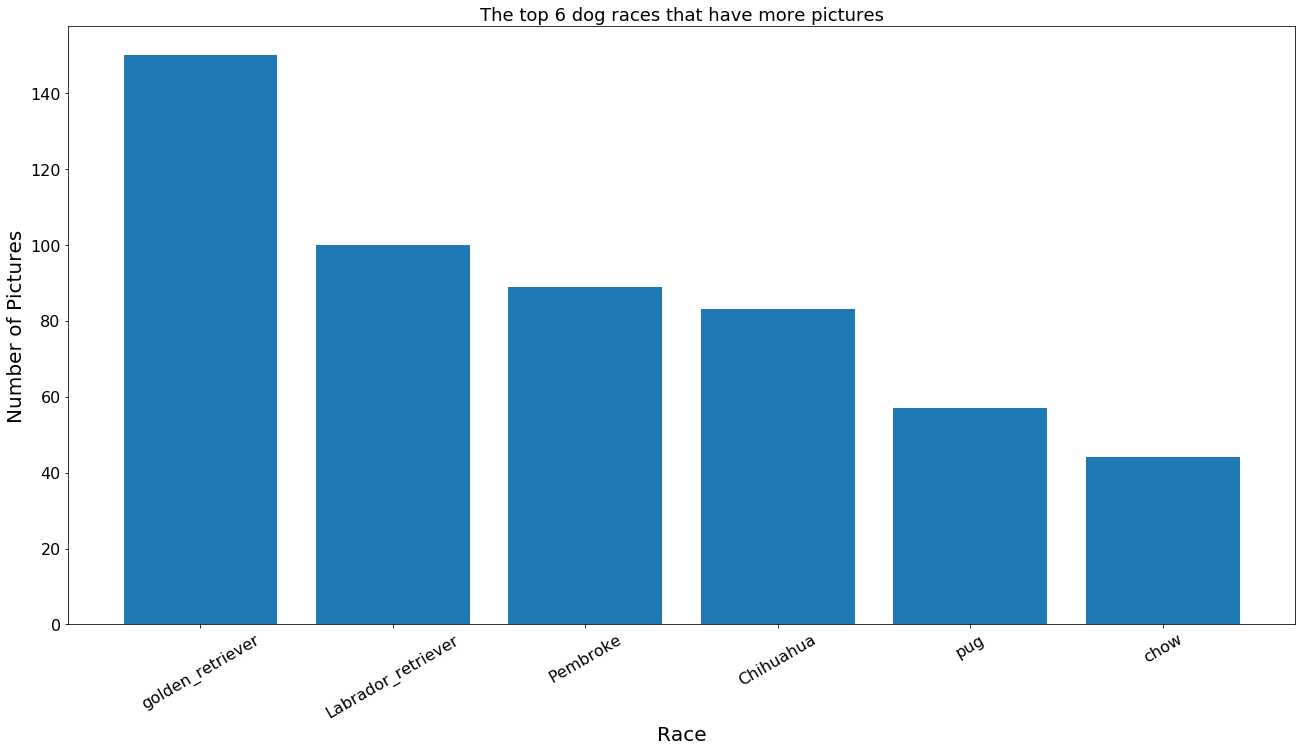

In [184]:
race1=merge_1_2['p1'].value_counts().index.tolist()[0]
race2=merge_1_2['p1'].value_counts().index.tolist()[1]
race3=merge_1_2['p1'].value_counts().index.tolist()[2]
race4=merge_1_2['p1'].value_counts().index.tolist()[3]
race5=merge_1_2['p1'].value_counts().index.tolist()[4]
race6=merge_1_2['p1'].value_counts().index.tolist()[5]


top1count=merge_1_2['p1'].value_counts()[0]
top2count=merge_1_2['p1'].value_counts()[1]
top3count=merge_1_2['p1'].value_counts()[2]
top4count=merge_1_2['p1'].value_counts()[3]
top5count=merge_1_2['p1'].value_counts()[4]
top6count=merge_1_2['p1'].value_counts()[5]

#month_hist_array = np.array([month_jan,month_feb,month_mar,month_apr,month_may,month_jun,month_jul],dtype=int)
month_hist_list = [top1count,top2count,top3count,top4count,top5count,top6count]

x_values = [1,2,3,4,5,6]

plt.figure(figsize=(22,11))

plt.bar(x_values,height=month_hist_list)
plt.xticks(x_values, [race1,race2,race3,race4,race5,race6]) # no need to add .5 anymore
plt.title('The top 6 dog races that have more pictures',size=18)
plt.xlabel('Race',size=20)
plt.ylabel('Number of Pictures',size=20)
plt.xticks(rotation=30,size=16)
plt.yticks(size=16)

plt.savefig('top6races.eps',dpi=500)

plt.show()




In [185]:
merge_2_3.columns

Index(['jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'tweet_id', 'favorite_count',
       'full_text', 'retweet_count', 'name', 'gender', 'rate_score', 'weekday',
       'month', 'day', 'year'],
      dtype='object')

In [186]:
merge_2_3.groupby(['gender'])['favorite_count'].sum()

gender
female    3117458
male      7783837
Name: favorite_count, dtype: int64

# fazer grafico acima sobre generos e favorite count


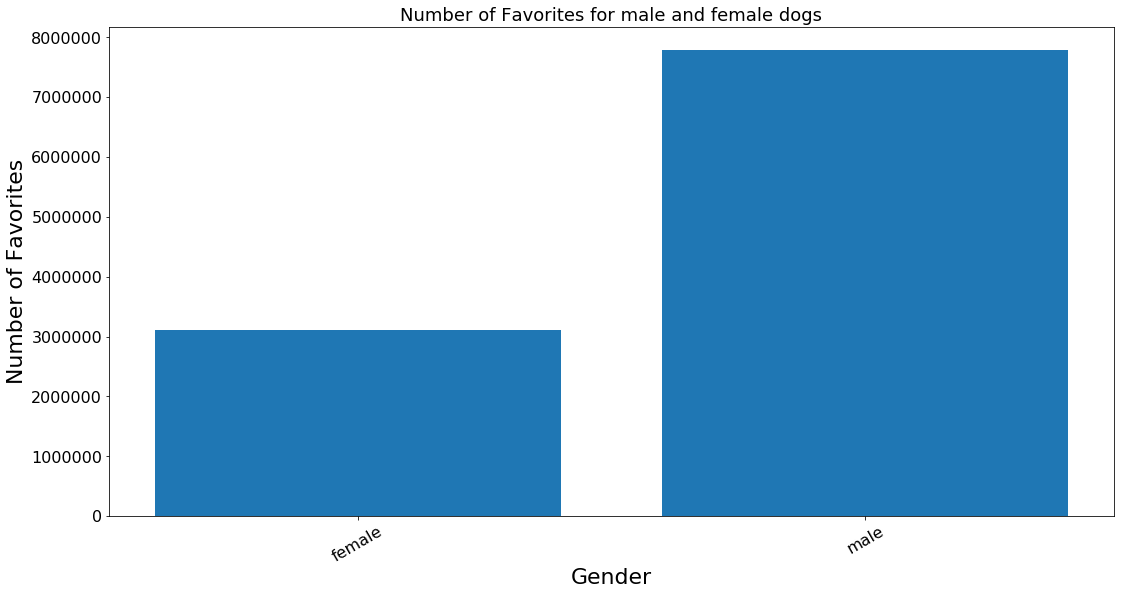

In [187]:

first_sum = merge_2_3.groupby(['gender'])['favorite_count'].sum()[0]
second_sum = merge_2_3.groupby(['gender'])['favorite_count'].sum()[1]

first_sum_index = merge_2_3.groupby(['gender'])['favorite_count'].sum().index.tolist()[0]
second_sum_index = merge_2_3.groupby(['gender'])['favorite_count'].sum().index.tolist()[1]

month_hist_list = [first_sum,second_sum]

x_values = [1,2]
plt.figure(figsize=(18,9))
plt.bar(x_values,height=month_hist_list)
plt.xticks(x_values, [first_sum_index,second_sum_index]) # no need to add .5 anymore
plt.title('Number of Favorites for male and female dogs',size=18)
plt.xlabel('Gender',size=22)
plt.ylabel('Number of Favorites',size=22)
plt.xticks(rotation=30,size=16)
plt.yticks(size=16)

plt.savefig('favorites_gender.eps',dpi=500)


plt.show()





# fazer grafico acima sobre generos e retweet_count


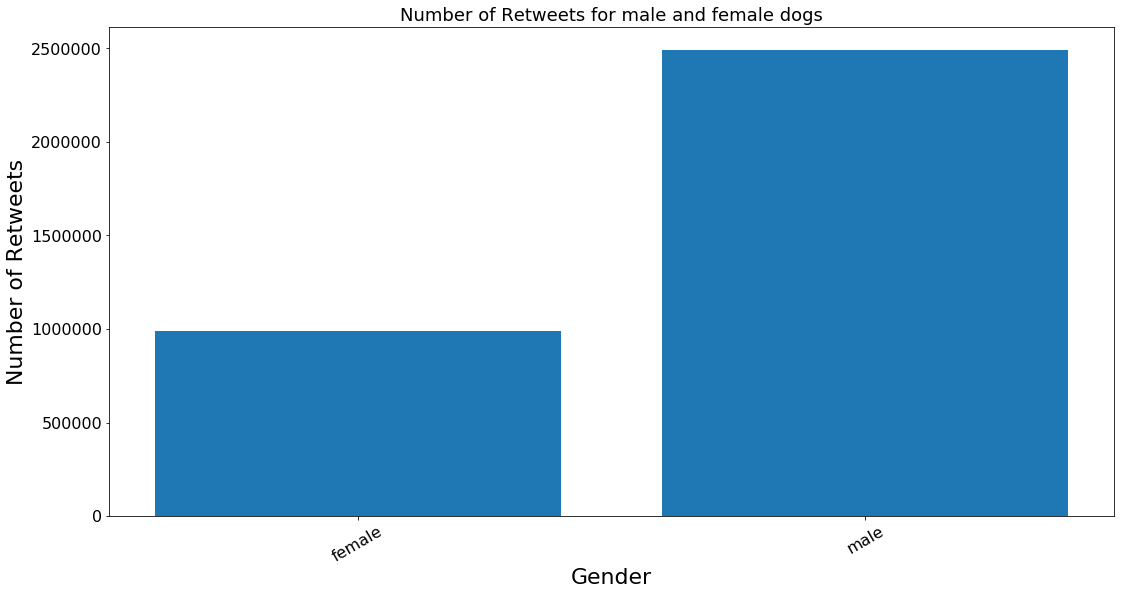

In [188]:

first_sum = merge_2_3.groupby(['gender'])['retweet_count'].sum()[0]
second_sum = merge_2_3.groupby(['gender'])['retweet_count'].sum()[1]

first_sum_index = merge_2_3.groupby(['gender'])['retweet_count'].sum().index.tolist()[0]
second_sum_index = merge_2_3.groupby(['gender'])['retweet_count'].sum().index.tolist()[1]

month_hist_list = [first_sum,second_sum]

x_values = [1,2]
plt.figure(figsize=(18,9))
plt.bar(x_values,height=month_hist_list)
plt.xticks(x_values, [first_sum_index,second_sum_index]) # no need to add .5 anymore
plt.title('Number of Retweets for male and female dogs',size=18)
plt.xlabel('Gender',size=22)
plt.ylabel('Number of Retweets',size=22)
plt.xticks(rotation=30,size=16)
plt.yticks(size=16)

plt.savefig('retweets_gender.eps',dpi=500)


plt.show()





In [189]:
merge_2_3.groupby(['gender'])['retweet_count'].sum()

gender
female     987188
male      2490413
Name: retweet_count, dtype: int64

In [190]:
# fazer grafico acima sobre generos e retweet_count


In [191]:
# última visualizacao
# vendo quantos cães da raça 'golden_retriever' foram postados nos 
# anos de 2015 e 2017 em função dos meses! :)
ano = '2015'
raca = 'golden_retriever'

#merge_2_3[merge_2_3['year']==ano and merge_2_3['p1']==raca]
print(merge_2_3[(merge_2_3['year']==ano) & (merge_2_3['p1']==raca)]['month'].value_counts())
ano = '2017'
print(merge_2_3[(merge_2_3['year']==ano) & (merge_2_3['p1']==raca)]['month'].value_counts())

# Logo, os resultados para o ano de 2017 sao os mais ricos!
# Faremos uma visualização do ano 2017 na forma de histograma!!


Nov    13
Dec    13
Name: month, dtype: int64
Feb    7
Jan    6
Jul    6
May    4
Mar    4
Apr    3
Jun    3
Name: month, dtype: int64


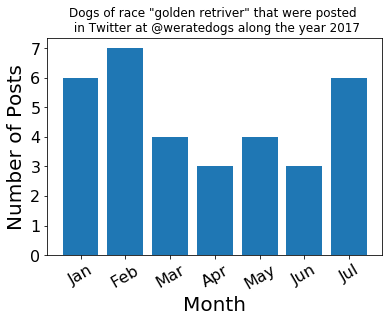

In [192]:

raca = 'golden_retriever'

ano = '2017'
month_iter = merge_2_3[(merge_2_3['year']==ano) & (merge_2_3['p1']==raca)]['month'].value_counts()
month_jan = month_iter[1]
month_feb = month_iter[0]
month_mar = month_iter[4]
month_apr = month_iter[-1]
month_may = month_iter[3]
month_jun = month_iter[-2]
month_jul = month_iter[2]

#month_hist_array = np.array([month_jan,month_feb,month_mar,month_apr,month_may,month_jun,month_jul],dtype=int)
month_hist_list = [month_jan,month_feb,month_mar,month_apr,month_may,month_jun,month_jul]

x_values = [1,2,3,4,5,6,7]

plt.bar(x_values,height=month_hist_list)
plt.xticks(x_values, ['Jan','Feb','Mar','Apr','May','Jun','Jul']) # no need to add .5 anymore
plt.title('Dogs of race "golden retriver" that were posted \n in Twitter at @weratedogs along the year 2017',size=12)
plt.xlabel('Month',size=20)
plt.ylabel('Number of Posts',size=20)
plt.xticks(rotation=30,size=16)
plt.yticks(size=16)
plt.savefig('golden.retriever_2017_months.eps',dpi=200)

plt.show()


# Exporting the master DataFrames!

In [193]:
# exporting the first master dataframe
merge_1_2.to_csv('twitter_archive_master1.csv',encoding='utf-8',index=False)



In [194]:
# exporting the second master dataframe
merge_2_3.to_csv('twitter_archive_master2.csv',encoding='utf-8',index=False)


# UFA!!!!! BAITA PROJETO! MUITO DIVERTIDO!!!